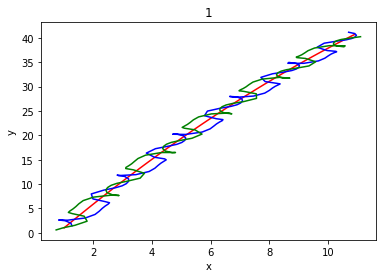

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def diffur(y,t,b,c):
    theta, omega = y
    dydt = [omega,b*c*np.sin(theta)] #b = 2*q*E/(m*d)
    return dydt



class Plotter: 
   
    def __init__(self, title, xlabel, ylabel): 
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.ax.set_title(title) 
        self.ax.set_xlabel(xlabel)
        self.ax.set_ylabel(ylabel)

    def plot(self, x, y, color): 
        return self.ax.plot(x, y, color)

    def show(self):
        plt.show()

class objec:
    def __init__(self,vx,vy,g,m,l,h,color,plotter):
        self.velx = vx
        self.vely = vy
        self.force = g
        self.mass = m
        self.large = l
        self.high = h
        self.color = color
        self.plotter = plotter
        
    def changex(self,time):
        return self.velx*time + self.large
    
    def changey(self,time):
        return self.vely*time - self.force/(2.0*self.mass)*time*time + self.high
    
    def evolution(self):
        time = np.arange(0.,10.0,0.1)
        xe = self.changex(time)
        ye = self.changey(time)
        plotter.plot(xe , ye ,'r')
        
        
class gantel(objec):
    def __init__(self,vx,vy,g,m,l,d,h,fi,w,E,q,th1,color,plotter):
        objec.__init__(self,vx,vy,g,m,l,h,color,plotter)
        
        self.E = E
        self.q = q
        self.theta = th1
        self.distance = d
        self.fi = fi
        self.omega = w
    
    def pol(self,time):
        y0 = [self.theta,self.omega]
        a = 2.*self.q*self.E/(self.mass*self.distance)
        
        return odeint(diffur,y0,time, args =(a,1.0))[:,0]
    
    def changeGantelX1(self,time):
        return self.velx*time  + self.large + self.distance*np.cos(self.pol(time)+self.fi)/2.0 
    
    def changeGantelY1(self,time):
        return self.vely*time - self.force/(2.0*self.mass)*time*time + self.high +self.distance*np.sin(self.pol(time)+self.fi)/2.0
    
    def changeGantelX2(self,time):
        return self.velx*time + self.large - self.distance*np.cos(self.pol(time)+self.fi)/2.0
    
    def changeGantelY2(self,time):
        return self.vely*time - self.force/(2.0*self.mass)*time*time + self.high - self.distance*np.sin(self.pol(time)+self.fi)/2.0
    
    def evolutionGantel(self):
        time = np.arange(0.,10.,0.1)
        
        xe1=self.changeGantelX1(time)
        ye1=self.changeGantelY1(time)
        plotter.plot(xe1, ye1, 'b')
        
        xe2=self.changeGantelX2(time)
        ye2=self.changeGantelY2(time)
        plotter.plot(xe2, ye2, self.color)
    

    
#gantel[(self,vx,vy,g,m,l,d,h,fi,w,E,q,th1,color,plotter)]   

plotter = Plotter('1','x','y')

gantelka = gantel(1.0,5.0,1.0,5.0,1.0,1.0,1.0,0.5,2.0,10.,10.0,0.5,'g',plotter)
gantelka.evolution()
gantelka.evolutionGantel()

plotter.show()